In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from sklearn.metrics import mean_squared_log_error

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import mlflow
import mlflow.sklearn
import mlflow.models

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
data = pd.read_csv("CSV/train.csv")
test = pd.read_csv("CSV/test.csv")
pd.set_option('display.max_columns', None)
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [18]:
data.columns.tolist()

['id',
 'Age',
 'Gender',
 'Annual Income',
 'Marital Status',
 'Number of Dependents',
 'Education Level',
 'Occupation',
 'Health Score',
 'Location',
 'Policy Type',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Policy Start Date',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type',
 'Premium Amount']

In [19]:
data.shape

(1200000, 21)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [21]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [22]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,1200000.0,599999.50,346410.31,0.00,299999.75,599999.50,899999.25,1199999.00
Age,1181295.0,41.15,13.54,18.00,30.00,41.00,53.00,64.00
Annual Income,1155051.0,32745.22,32179.51,1.00,8001.00,23911.00,44634.00,149997.00
Number of Dependents,1090328.0,2.01,1.42,0.00,1.00,2.00,3.00,4.00
Health Score,1125924.0,25.61,12.20,2.01,15.92,24.58,34.53,58.98
Previous Claims,835971.0,1.00,0.98,0.00,0.00,1.00,2.00,9.00
Vehicle Age,1199994.0,9.57,5.78,0.00,5.00,10.00,15.00,19.00
Credit Score,1062118.0,592.92,149.98,300.00,468.00,595.00,721.00,849.00
Insurance Duration,1199999.0,5.02,2.59,1.00,3.00,5.00,7.00,9.00
Premium Amount,1200000.0,1102.54,865.00,20.00,514.00,872.00,1509.00,4999.00


In [23]:
data["Policy Start Date"] = pd.to_datetime(data["Policy Start Date"], errors='coerce').dt.date

In [24]:
data["Policy Start Date"]

0          2023-12-23
1          2023-06-12
2          2023-09-30
3          2024-06-12
4          2021-12-01
              ...    
1199995    2023-05-03
1199996    2022-09-10
1199997    2021-05-25
1199998    2021-09-19
1199999    2020-08-26
Name: Policy Start Date, Length: 1200000, dtype: object

In [25]:
data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,2023-05-03,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,2022-09-10,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,2021-05-25,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19,Poor,No,Daily,Apartment,596.0


In [26]:
data.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [27]:
tar_col ='Premium Amount';
num_col = data.select_dtypes(include = ['number']).columns
cat_col = data.select_dtypes(include = ['object']).columns
print("Target Column :" ,tar_col)
print( "\nNumerical Columns :" , num_col.tolist())
print( "\nCategorical Columns :" , cat_col.tolist())

Target Column : Premium Amount

Numerical Columns : ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']

Categorical Columns : ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']


In [28]:
num_data = data.select_dtypes(include = ['number'])
cat_data = data.select_dtypes(include = ['object'])

In [29]:
num_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,1200000.0,599999.50,346410.31,0.00,299999.75,599999.50,899999.25,1199999.00
Age,1181295.0,41.15,13.54,18.00,30.00,41.00,53.00,64.00
Annual Income,1155051.0,32745.22,32179.51,1.00,8001.00,23911.00,44634.00,149997.00
Number of Dependents,1090328.0,2.01,1.42,0.00,1.00,2.00,3.00,4.00
Health Score,1125924.0,25.61,12.20,2.01,15.92,24.58,34.53,58.98
Previous Claims,835971.0,1.00,0.98,0.00,0.00,1.00,2.00,9.00
Vehicle Age,1199994.0,9.57,5.78,0.00,5.00,10.00,15.00,19.00
Credit Score,1062118.0,592.92,149.98,300.00,468.00,595.00,721.00,849.00
Insurance Duration,1199999.0,5.02,2.59,1.00,3.00,5.00,7.00,9.00
Premium Amount,1200000.0,1102.54,865.00,20.00,514.00,872.00,1509.00,4999.00


In [30]:
cat_data.describe().T

,count,unique,top,freq
Gender,1200000,2,Male,602571
Marital Status,1181471,3,Single,395391
Education Level,1200000,4,Master's,303818
Occupation,841925,3,Employed,282750
Location,1200000,3,Suburban,401542
Policy Type,1200000,3,Premium,401846
Policy Start Date,1200000,1826,2021-06-30,969
Customer Feedback,1122176,3,Average,377905
Smoking Status,1200000,2,Yes,601873
Exercise Frequency,1200000,4,Weekly,306179


In [31]:
for i in cat_col:
    print (f'Value Count for {i}')
    print(data[i].value_counts())
    print('='*20)

Value Count for Gender
Gender
Male      602571
Female    597429
Name: count, dtype: int64
Value Count for Marital Status
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64
Value Count for Education Level
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64
Value Count for Occupation
Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64
Value Count for Location
Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64
Value Count for Policy Type
Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64
Value Count for Policy Start Date
Policy Start Date
2021-06-30    969
2023-02-02    951
2021-02-08    950
2022-07-13    941
2022-05-13    937
             ... 
2024-08-08    440
2024-08-15    423
2023-10-19    420
2024-03-10    

In [32]:
sample_data  = data.groupby("Premium Amount").sample(frac=0.2, random_state= 8).reset_index(drop = True)

In [33]:
sample_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,948936,46.0,Male,46403.0,Married,0.0,Bachelor's,Self-Employed,14.121177,Urban,Comprehensive,NaN,12.0,414.0,9.0,2023-02-21,Average,Yes,Rarely,Condo,20.0
1,1022903,28.0,Male,27442.0,Married,4.0,High School,NaN,NaN,Suburban,Basic,NaN,17.0,NaN,6.0,2021-09-28,Average,No,Rarely,Condo,20.0
2,403266,34.0,Female,758.0,Divorced,3.0,Master's,NaN,24.573389,Urban,Comprehensive,NaN,0.0,696.0,1.0,2020-10-29,Poor,Yes,Weekly,Condo,20.0
3,42555,30.0,Male,1313.0,Single,2.0,High School,NaN,44.929552,Rural,Premium,NaN,18.0,593.0,1.0,2022-03-05,Average,No,Daily,House,20.0
4,465354,36.0,Male,30443.0,Divorced,4.0,Bachelor's,Employed,28.788200,Rural,Comprehensive,0.0,15.0,531.0,2.0,2021-05-05,Average,No,Weekly,Apartment,20.0


In [34]:
# for i in cat_col:
#     fig , axes = plt.subplots(1,2 , figsize=(10,6))
#     sns.countplot(data=sample_data, x=i, palette='viridis', ax= axes[0])
#     axes[0].set_title(f'Distribution of {i}', fontsize=20)
#     axes[0].set_xlabel(i, fontsize=12)
#     axes[0].set_ylabel('Count', fontsize=12)
#     # BoxPlot
#     sns.boxplot(data , x=i , y=tar_col ,palette= 'viridis', ax= axes[1])
#     axes[1].set_title(f"Box Plot for {i}" , fontsize = 20)
#     axes[1].set_xlabel(i,fontsize=12)
#     axes[1].set_ylabel(tar_col,fontsize=12)
#     plt.tight_layout()
#     plt.show()

In [35]:
# for i in num_col:
#     fig , axes = plt.subplots(1,2 ,figsize= (10,6))
#     # HistPlot
#     sns.histplot(sample_data , x=i ,bins= 20,kde=True ,color ='#4C1F7A' ,edgecolor = 'black', alpha =0.6 ,ax= axes[0])
#     axes[0].set_title(f"Histogram Plot for {i}" , fontsize = 20)
#     axes[0].set_xlabel(i , fontsize=15)
#     # BoxPlot
#     sns.boxplot(data , x=i ,palette= 'viridis', ax = axes[1])
#     axes[1].set_title(f"Box Plot for {i}" , fontsize = 20)
#     axes[1].set_xlabel(i , fontsize=15)
#     plt.tight_layout()
#     plt.show()
    

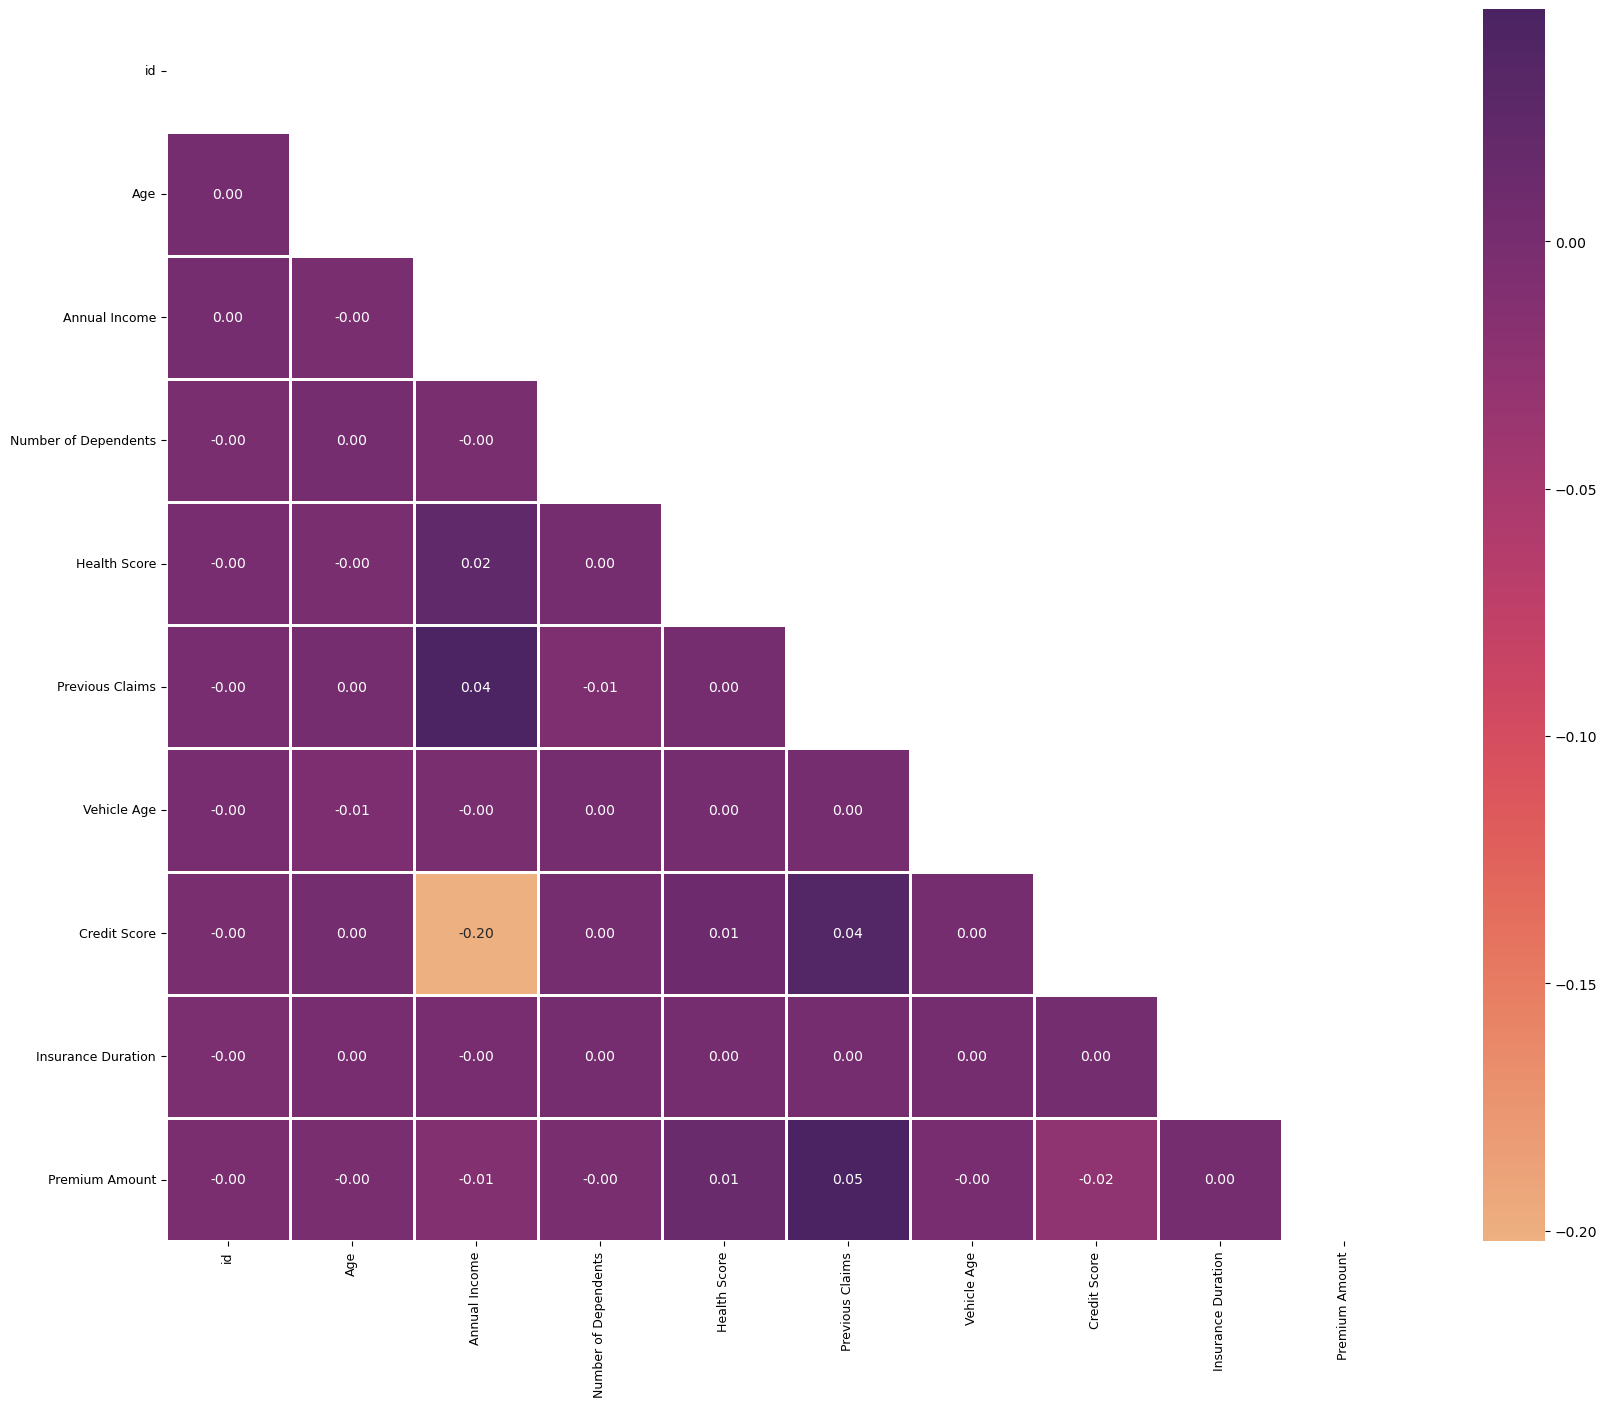

In [36]:
corr_mat = sample_data[num_col].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize = (20,16))
sns.heatmap(sample_data[num_col].corr(),
            mask=mask,
            annot = True ,   fmt ='.2f',
            linewidth=1    ,cmap = 'flare'
           )
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.show()

In [37]:
def date_trans(df):
    df['Policy Start Date']= pd.to_datetime(df['Policy Start Date'])
    df['Year'] = df['Policy Start Date'].dt.year
    df['Day'] = df['Policy Start Date'].dt.day
    df['Month'] = df['Policy Start Date'].dt.month
    df.drop('Policy Start Date' , axis =1, inplace = True)
    return df

In [38]:
data.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [39]:
train_data = date_trans(data)
test_data = date_trans(test)

In [40]:
X = train_data.drop(columns=[tar_col, 'id' , 'Year', 'Month', 'Day'])
y = train_data[tar_col]

In [41]:
num_data = train_data.select_dtypes(include = ['number'])
cat_data = train_data.select_dtypes(include = ['object'])

In [42]:
num_col

Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

In [43]:
cat_col

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [44]:
num_col = num_col.drop(['id','Premium Amount'])

In [45]:
cat_col = cat_col.drop(['Policy Start Date'])

In [46]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    # ('scaler', StandardScaler())                       # Scale numerical features
])

# Preprocessing pipeline for categorical features
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))                      # Encode categorical features
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_col),
        ('cat', cat_pipeline, cat_col)
    ]
)
X_processed = preprocessor.fit_transform(X)
test_transformed = preprocessor.transform(test_data.drop(columns=['id',  'Year', 'Month', 'Day']))

In [47]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object'))])

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [49]:
# # 📌 Define evaluation function
# def evaluate_model(model, X_val, y_val):
#     y_pred = model.predict(X_val)
    
#     # Root Mean Squared Logarithmic Error (RMSLE)
#     rmsle = np.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred)))

#     # Root Mean Squared Error (RMSE)
#     rmse = np.sqrt(mean_squared_error(y_val, y_pred))

#     # Mean Absolute Error (MAE)
#     mae = mean_absolute_error(y_val, y_pred)

#     # R² Score
#     r2 = r2_score(y_val, y_pred)

#     return {"RMSLE": rmsle, "RMSE": rmse, "MAE": mae, "R² Score": r2}



In [50]:
# 📌 Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# 📌 Train and evaluate each model
results = {}
# for name, model in models.items():
#     print(f"Training {name}...")
#     model.fit(X_train, y_train)
#     results[name] = evaluate_model(model, X_val, y_val)

# 📌 Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T


Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training XGBoost...



Model Evaluation Results:
                       RMSLE        RMSE         MAE  R² Score
Linear Regression  1.168051  862.895550  666.893604  0.003609
Decision Tree      1.159343  852.458942  653.146903  0.027566
Random Forest      1.159160  852.255282  653.121941  0.028030
XGBoost            1.149939  845.828308  646.942441  0.042634


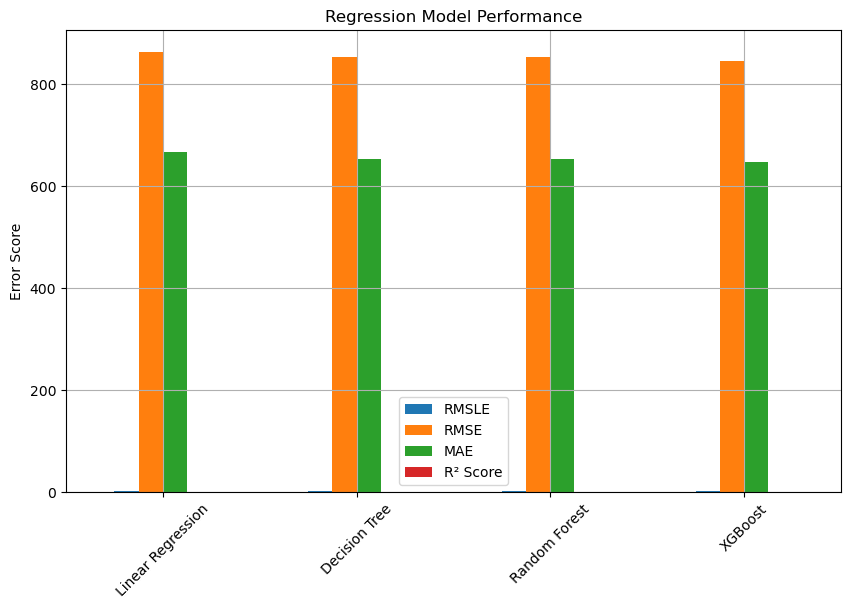

In [51]:
print("\nModel Evaluation Results:\n", results_df)

# 📊 Plot results
results_df.plot(kind="bar", figsize=(10,6), title="Regression Model Performance")
plt.ylabel("Error Score")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [52]:
xgb_model = xgb.XGBRegressor(eval_metric='rmsle', tree_method='hist')

In [53]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [54]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, error_score='raise')

In [55]:
best_parameter =  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}

In [56]:
xgb_mb= XGBRegressor(**best_parameter) # Unpack the best_parameter dictionary
xgb_mb.fit(X_train ,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
y_val = np.nan_to_num(y_val)

In [58]:
y_pred = xgb_mb.predict(X_val)
rmsle= np.sqrt(mean_squared_log_error(y_val,y_pred))
print(f"RMSLE : {rmsle} " )

RMSLE : 1.1439114281299476 


In [59]:
output= pd.DataFrame(test_data['id'])
xgb_output = xgb_mb.predict(test_transformed)
output['Premium Amount']= xgb_output

In [60]:
output['Premium Amount']

0         1219.472412
1         1120.969971
2         1089.526733
3         1077.663696
4         1048.701050
             ...     
799995    1219.005127
799996    1433.432617
799997    1097.536377
799998    1177.505615
799999    1071.709229
Name: Premium Amount, Length: 800000, dtype: float32

In [61]:
# XGBoost Predictions on Validation Set
y_pred = xgb_mb.predict(X_val)

# Compute Evaluation Metrics
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))  # RMSLE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))        # RMSE
mae = mean_absolute_error(y_val, y_pred)                 # MAE
r2 = r2_score(y_val, y_pred)                             # R² Score

# Print results
print(" **XGBoost Model Evaluation on Validation Data**")
print(f" **RMSLE**: {rmsle:.4f}")
print(f" **RMSE**: {rmse:.4f}")
print(f" **MAE**: {mae:.4f}")
print(f" **R² Score**: {r2:.4f}")

# Predictions on Test Data
xgb_output = xgb_mb.predict(test_transformed)

# Store Predictions in DataFrame
output = pd.DataFrame({'id': test_data['id'], 'Premium Amount': xgb_output})

 **XGBoost Model Evaluation on Validation Data**
 **RMSLE**: 1.1439
 **RMSE**: 840.4895
 **MAE**: 638.5116
 **R² Score**: 0.0547


In [62]:
# def mlflow_train_and_evaluate(model, model_name, X_train, X_val, y_train, y_val, test_transformed, test_data, feature_names, experiment_name="insurance_premium_prediction"):
#     """Automated ML pipeline for training & evaluating a model with MLflow tracking."""
    
#     mlflow.set_experiment(experiment_name)

#     with mlflow.start_run():
#         # 1️⃣ Set Model Name in MLflow
#         mlflow.set_tag("model_name", model_name)

#         # 2️⃣ Log Dataset Information
#         mlflow.log_param("dataset_total_size", len(X_train) + len(X_val))
#         mlflow.log_param("train_size", len(X_train))
#         mlflow.log_param("val_size", len(X_val))
#         mlflow.log_param("feature_count", X_train.shape[1])

#         # 3️⃣ Log Feature Names as a Single String
#         mlflow.log_param("feature_names", ", ".join(feature_names))  # ✅ FIXED

#         # 4️⃣ Train Model
#         model.fit(X_train, y_train)

#         # 5️⃣ Predictions & Evaluation
#         y_pred = model.predict(X_val)
#         rmsle = np.sqrt(mean_squared_log_error(y_val, np.clip(y_pred, 0, None)))  # Prevent negative values
#         rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#         mae = mean_absolute_error(y_val, y_pred)
#         r2 = r2_score(y_val, y_pred)

#         # 6️⃣ Log Model Hyperparameters (if available)
#         if hasattr(model, "get_params"):
#             mlflow.log_params(model.get_params())

#         # 7️⃣ Log Metrics in MLflow
#         mlflow.log_metric("RMSLE", rmsle)
#         mlflow.log_metric("RMSE", rmse)
#         mlflow.log_metric("MAE", mae)
#         mlflow.log_metric("R2 Score", r2)

#         # # 8️⃣ Convert X_val.iloc[0] to DataFrame with Correct Feature Names
#         # input_example = pd.DataFrame([X_val.iloc[0]], columns=feature_names)  # ✅ FIXED

#         # 9️⃣ Log Model with Input Signature & Name
#         mlflow.sklearn.log_model(model, artifact_path=model_name)

#         # 🔟 Print Evaluation Results
#         print(f" **{model_name} Model Evaluation on Validation Data**")
#         print(f" **RMSLE**: {rmsle:.4f}")
#         print(f" **RMSE**: {rmse:.4f}")
#         print(f" **MAE**: {mae:.4f}")
#         print(f" **R² Score**: {r2:.4f}")

#         # 🔟 Generate Predictions for Test Data
#         test_predictions = model.predict(test_transformed)

#         # Store Predictions in DataFrame
#         output = pd.DataFrame({'id': test_data['id'], 'Premium Amount': test_predictions}) 

#         print(f"✅ {model_name} Model and predictions saved in MLflow!")

#     return model, output

In [63]:
# Define Feature Names
feature_names = ['Age', 'Annual Income', 'Credit Score', 'Vehicle Age', 'Health Score', 
                 'Number of Dependents', 'Previous Claims', 'Insurance Duration']

# Train & Log Multiple Models with MLflow
models = {
    "XGBoost": XGBRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "LinearRegression": LinearRegression()
}

# for model_name, model in models.items():
#     mlflow_train_and_evaluate(model, model_name, X_train, X_val, y_train, y_val, test_transformed, test_data, feature_names)


2025/03/30 15:13:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 **XGBoost Model Evaluation on Validation Data**
 **RMSLE**: 1.1431
 **RMSE**: 842.1146
 **MAE**: 638.9149
 **R² Score**: 0.0510
✅ XGBoost Model and predictions saved in MLflow!


2025/03/30 15:13:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 **DecisionTree Model Evaluation on Validation Data**
 **RMSLE**: 1.5186
 **RMSE**: 1232.7528
 **MAE**: 893.0760
 **R² Score**: -1.0336
✅ DecisionTree Model and predictions saved in MLflow!


2025/03/30 15:33:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 **RandomForest Model Evaluation on Validation Data**
 **RMSLE**: 1.1582
 **RMSE**: 849.3616
 **MAE**: 651.5861
 **R² Score**: 0.0346
✅ RandomForest Model and predictions saved in MLflow!


2025/03/30 15:33:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 **LinearRegression Model Evaluation on Validation Data**
 **RMSLE**: 1.1681
 **RMSE**: 862.8955
 **MAE**: 666.8936
 **R² Score**: 0.0036
✅ LinearRegression Model and predictions saved in MLflow!


In [64]:
# # Define models to train
# models = {
#     "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42),
#     "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
#     "Random Forest": RandomForestRegressor(n_estimators=40, max_depth=5, random_state=42),
#     "Linear Regression": LinearRegression()
# }

# # Train & Evaluate all models
# trained_models = {}
# test_predictions_dict = {}

# for model_name, model in models.items():
#     trained_model, test_predictions = mlflow_train_and_evaluate(
#         model, model_name, X_train, X_val, y_train, y_val, test_transformed, test_data
#     )
#     trained_models[model_name] = trained_model
#     test_predictions_dict[model_name] = test_predictions

In [65]:
import pickle

# Save OneHotEncoder
with open("encoder.pkl", "wb") as f:
    pickle.dump(preprocessor.named_transformers_['cat'].named_steps['onehot'], f)

In [66]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Also check for numeric columns that might be categorical (like integers with few unique values)
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    if data[col].nunique() < 10:  # Threshold of 10 unique values is common for categorical
        categorical_columns.append(col)

# Create a dictionary to store unique values for each categorical column
categorical_unique_values = {}

# Get unique values for each categorical column
for col in categorical_columns:
    categorical_unique_values[col] = data[col].unique().tolist()
    
# Display the results
print("Categorical columns found:", categorical_columns)
print("\nUnique values for each categorical column:")
for col, values in categorical_unique_values.items():
    print(f"\n{col}: {values}")
    print(f"Count: {len(values)} unique values")

Categorical columns found: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Number of Dependents', 'Insurance Duration']

Unique values for each categorical column:

Gender: ['Female', 'Male']
Count: 2 unique values

Marital Status: ['Married', 'Divorced', 'Single', nan]
Count: 4 unique values

Education Level: ["Bachelor's", "Master's", 'High School', 'PhD']
Count: 4 unique values

Occupation: ['Self-Employed', nan, 'Employed', 'Unemployed']
Count: 4 unique values

Location: ['Urban', 'Rural', 'Suburban']
Count: 3 unique values

Policy Type: ['Premium', 'Comprehensive', 'Basic']
Count: 3 unique values

Customer Feedback: ['Poor', 'Average', 'Good', nan]
Count: 4 unique values

Smoking Status: ['No', 'Yes']
Count: 2 unique values

Exercise Frequency: ['Weekly', 'Monthly', 'Daily', 'Rarely']
Count: 4 unique values

Property Type: ['House', 'Apartment', 'Condo']
Count: 3

In [67]:
import pickle
import mlflow.pyfunc
import pandas as pd

# Load the trained model
model_uri = "runs:/899d644802f5443c9bc96e02144efddf/xgboost_model"
model = mlflow.pyfunc.load_model(model_uri)

# Load OneHotEncoder
with open("encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Define categorical and numerical columns
num_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
            'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']

cat_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
            'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

# Test cases
test_cases = [
    {  # First test case
        'Age': 40, 'Annual Income': 23897, 'Number of Dependents': 1, 'Health Score': 29.08203616,
        'Previous Claims': 2, 'Vehicle Age': 15, 'Credit Score': 498, 'Insurance Duration': 30,
        'Gender': 'Female', 'Marital Status': 'Divorced', 'Education Level': "High School",
        'Occupation': "Self-Employed", 'Location': "Suburban", 'Policy Type': "Basic",
        'Customer Feedback': "Good", 'Smoking Status': "No", 'Exercise Frequency': "Rarely", 
        'Property Type': "Condo"
    },
    {  # Second test case (should predict close to 794)
        'Age': 21, 'Annual Income': 9085, 'Number of Dependents': 0, 'Health Score': 25.71928448,
        'Previous Claims': 1, 'Vehicle Age': 10, 'Credit Score':489 , 'Insurance Duration': 8,
        'Gender': 'Male', 'Marital Status': 'Married', 'Education Level': "PhD",
        'Occupation': "Self-Employed", 'Location': "Urban", 'Policy Type': "Comprehensive",
        'Customer Feedback': "Poor", 'Smoking Status': "Yes", 'Exercise Frequency': "Weekly", 
        'Property Type': "Apartment"
    },{
    'Age': 34,
    'Annual Income': 12221,
    'Number of Dependents': 0,
    'Health Score': 37.82939869,
    'Previous Claims': 1,
    'Vehicle Age': 1,
    'Credit Score': 794,
    'Insurance Duration': 1,
    'Gender': 'Female',
    'Marital Status': 'Divorced',
    'Education Level': "High School",
    'Occupation': "Employed",
    'Location': "Rural",
    'Policy Type': "Comprehensive",
    'Customer Feedback': "Average",
    'Smoking Status': "Yes",
    'Exercise Frequency': "Weekly",
    'Property Type': "House"
}
]

# Run predictions
for i, test_input in enumerate(test_cases):
    input_data = pd.DataFrame([test_input])

    # Encode categorical features
    encoded_cat = encoder.transform(input_data[cat_cols])
    encoded_cat_df = pd.DataFrame(encoded_cat.toarray(), columns=encoder.get_feature_names_out(cat_cols))

    # Merge numerical and encoded categorical data
    input_data = input_data.drop(columns=cat_cols)
    input_data = pd.concat([input_data, encoded_cat_df], axis=1)

    # Define expected feature order
    expected_features = num_cols + list(encoder.get_feature_names_out(cat_cols))
    input_data = input_data.reindex(columns=expected_features, fill_value=0)

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Print results
    if i == 1:  # Second case (should be close to 794)
        print(f"Test Case {i+1} - Expected Premium: $794, Predicted Premium: ${prediction:.2f}")
    else:
        print(f"Test Case {i+1} - Predicted Premium: ${prediction:.2f}")


Test Case 1 - Predicted Premium: $1160.89
Test Case 2 - Expected Premium: $794, Predicted Premium: $1060.84
Test Case 3 - Predicted Premium: $1041.18


In [68]:
data = pd.read_csv('CSV/train.csv')
test_data = pd.read_csv('CSV/test.csv')

In [69]:
na_features = []
for col in data.columns:
    if data[col].isnull().any():
        na_features.append(col)
        
na_numerical_features = []
na_categorical_features = []

for col in na_features:
    if data[col].dtype == 'O':
        na_categorical_features.append(col)
    else:
        na_numerical_features.append(col)


na_numerical_features

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration']

In [70]:
na_categorical_features

['Marital Status', 'Occupation', 'Customer Feedback']

In [71]:
data['Age_mean'] = data['Age'].fillna(data['Age'].mean())

In [ ]:
data = data.drop('Age_mean',axis=1)



In [74]:
data[na_numerical_features].isnull().sum()

Age                     0
Annual Income           0
Number of Dependents    0
Health Score            0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
dtype: int64

In [75]:
for col in na_categorical_features:
    data[col] = data[col].fillna(data[col].mode()[0])
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [76]:
data[na_categorical_features].isnull().sum()

Marital Status       0
Occupation           0
Customer Feedback    0
dtype: int64

In [77]:
data['Previous Claims'] = np.log1p(data['Previous Claims'])
data['Premium Amount'] = np.log1p(data['Premium Amount'])
data['Annual Income'] = np.log(data['Annual Income'])

#test dataset
test_data['Previous Claims'] = np.log1p(test_data['Previous Claims'])
test_data['Annual Income'] = np.log(test_data['Annual Income'])

In [78]:
categorical_features = data.select_dtypes(include='object')
categorical_features.head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,2023-12-23 15:21:39.134960,Poor,No,Weekly,House
1,Female,Divorced,Master's,Employed,Rural,Comprehensive,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,Employed,Rural,Basic,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House


In [79]:
OHE_data = pd.get_dummies(data,columns = ['Marital Status','Occupation','Location','Property Type'],prefix=['Marital Status','Occupation','Location','Property Type'])
#test data
OHE_test_data = pd.get_dummies(test_data,columns = ['Marital Status','Occupation','Location','Property Type'],prefix=['Marital Status','Occupation','Location','Property Type'])

In [80]:
OHE_data.head()

,id,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Premium Amount,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Location_Rural,Location_Suburban,Location_Urban,Property Type_Apartment,Property Type_Condo,Property Type_House
0,0,19.0,Female,9.215228,1.0,Bachelor's,22.598761,Premium,1.098612,17.0,372.00000,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,7.962067,False,True,False,False,True,False,False,False,True,False,False,True
1,1,39.0,Female,10.363378,3.0,Master's,15.569731,Comprehensive,0.693147,12.0,694.00000,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,7.302496,True,False,False,True,False,False,True,False,False,False,False,True
2,2,23.0,Male,10.150426,3.0,High School,47.177549,Premium,0.693147,14.0,592.92435,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,6.342121,True,False,False,False,True,False,False,True,False,False,False,True
3,3,21.0,Male,11.862561,2.0,Bachelor's,10.938144,Basic,0.693147,0.0,367.00000,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,6.641182,False,True,False,True,False,False,True,False,False,True,False,False
4,4,21.0,Male,10.587871,1.0,Bachelor's,20.376094,Premium,0.000000,8.0,598.00000,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,7.612337,False,False,True,False,True,False,True,False,False,False,False,True


In [259]:
from sklearn.preprocessing import OrdinalEncoder

#mentioning order for ordinal relationship
categories = [
    ['High School',"Bachelor's","Master's",'PhD'],
    ['Basic', 'Comprehensive', 'Premium'],
    ['Poor', 'Average', 'Good'],
    ['Rarely', 'Monthly', 'Weekly', 'Daily']
    ]

ordinal_encoder = OrdinalEncoder(categories=categories)
#train data
OHE_data[['Education Level','Policy Type', 'Customer Feedback', 'Exercise Frequency']] =ordinal_encoder.fit_transform(OHE_data[['Education Level','Policy Type', 'Customer Feedback', 'Exercise Frequency']])

#test data
OHE_test_data[['Education Level','Policy Type', 'Customer Feedback', 'Exercise Frequency']] =ordinal_encoder.fit_transform(OHE_test_data[['Education Level','Policy Type', 'Customer Feedback', 'Exercise Frequency']])

ValueError: could not convert string to float: 'High School'

In [261]:
#train data
OHE_data['Smoking Status'] = np.where(OHE_data['Smoking Status'] == 'Yes',1,0)
OHE_data['Gender'] = np.where(OHE_data['Gender'] == 'Male',1,0)

#test data
OHE_test_data['Smoking Status'] = np.where(OHE_test_data['Smoking Status'] == 'Yes',1,0)
OHE_test_data['Gender'] = np.where(OHE_test_data['Gender'] == 'Male',1,0)

In [83]:
OHE_data.head()

,id,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Premium Amount,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Location_Rural,Location_Suburban,Location_Urban,Property Type_Apartment,Property Type_Condo,Property Type_House
0,0,19.0,0,9.215228,1.0,1.0,22.598761,2.0,1.098612,17.0,372.00000,5.0,2023-12-23 15:21:39.134960,0.0,0,2.0,7.962067,False,True,False,False,True,False,False,False,True,False,False,True
1,1,39.0,0,10.363378,3.0,2.0,15.569731,1.0,0.693147,12.0,694.00000,2.0,2023-06-12 15:21:39.111551,1.0,1,1.0,7.302496,True,False,False,True,False,False,True,False,False,False,False,True
2,2,23.0,1,10.150426,3.0,0.0,47.177549,2.0,0.693147,14.0,592.92435,3.0,2023-09-30 15:21:39.221386,2.0,1,2.0,6.342121,True,False,False,False,True,False,False,True,False,False,False,True
3,3,21.0,1,11.862561,2.0,1.0,10.938144,0.0,0.693147,0.0,367.00000,1.0,2024-06-12 15:21:39.226954,0.0,1,3.0,6.641182,False,True,False,True,False,False,True,False,False,True,False,False
4,4,21.0,1,10.587871,1.0,1.0,20.376094,2.0,0.000000,8.0,598.00000,4.0,2021-12-01 15:21:39.252145,0.0,1,2.0,7.612337,False,False,True,False,True,False,True,False,False,False,False,True


In [241]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

# Apply MinMax scaling on numerical columns in the train data
OHE_data[['Age','Annual Income','Number of Dependents','Health Score','Previous Claims','Vehicle Age','Credit Score','Insurance Duration']] = scalar.fit_transform(OHE_data[['Age','Annual Income','Number of Dependents','Health Score','Previous Claims','Vehicle Age','Credit Score','Insurance Duration']])

# Apply MinMax scaling on the same numerical columns in the test data
# Use transform() on the test data (not fit_transform)
OHE_test_data[['Age','Annual Income','Number of Dependents','Health Score','Previous Claims','Vehicle Age','Credit Score','Insurance Duration']] = scalar.transform(OHE_test_data[['Age','Annual Income','Number of Dependents','Health Score','Previous Claims','Vehicle Age','Credit Score','Insurance Duration']])


In [243]:
import pickle

# Save the encoder and scaler after fitting on training data
with open('encoder.pkl', 'wb') as f:
    pickle.dump(ordinal_encoder, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scalar, f)

In [237]:
y_train = OHE_data['Premium Amount']
x_train = OHE_data.drop(['Premium Amount','id','Policy Start Date'],axis=1)
x_train['Year'] = OHE_data['Policy Start Date'].str[0:4].astype(int)
x_train['Month'] = OHE_data['Policy Start Date'].str[5:7].astype(int)

In [239]:
x_train

,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Location_Rural,Location_Suburban,Location_Urban,Property Type_Apartment,Property Type_Condo,Property Type_House,Year,Month
0,0.021739,0,0.773195,0.250000,1.0,0.361397,2.0,0.477121,0.894737,0.131148,0.500,0.0,0,2.0,False,True,False,False,True,False,False,False,True,False,False,True,2023,12
1,0.456522,0,0.869530,0.750000,2.0,0.238002,1.0,0.301030,0.631579,0.717668,0.125,1.0,1,1.0,True,False,False,True,False,False,True,False,False,False,False,True,2023,6
2,0.108696,1,0.851662,0.750000,0.0,0.792879,2.0,0.301030,0.736842,0.533560,0.250,2.0,1,2.0,True,False,False,False,True,False,False,True,False,False,False,True,2023,9
3,0.065217,1,0.995317,0.500000,1.0,0.156695,0.0,0.301030,0.000000,0.122040,0.000,0.0,1,3.0,False,True,False,True,False,False,True,False,False,True,False,False,2024,6
4,0.065217,1,0.888366,0.250000,1.0,0.322378,2.0,0.000000,0.421053,0.542805,0.375,0.0,1,2.0,False,False,True,False,True,False,True,False,False,False,False,True,2021,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,0.391304,0,0.857099,0.000000,2.0,0.206459,2.0,0.301030,0.263158,0.131148,0.250,0.0,0,3.0,False,True,False,False,False,True,False,False,True,True,False,False,2023,5
1199996,0.782609,1,0.879761,0.502483,2.0,0.166268,1.0,0.301030,0.526316,0.540984,0.375,0.0,0,2.0,True,False,False,False,True,False,True,False,False,True,False,False,2022,9
1199997,0.021739,1,0.910927,0.000000,2.0,0.223164,0.0,0.000000,1.000000,0.533560,0.625,2.0,0,1.0,True,False,False,True,False,False,False,True,False,False,True,False,2021,5
1199998,0.804348,1,0.845929,0.250000,3.0,0.290275,2.0,0.301030,0.368421,0.194900,0.375,0.0,0,3.0,False,False,True,True,False,False,False,True,False,True,False,False,2021,9


In [193]:
x_train.columns

Index(['Age', 'Gender', 'Annual Income', 'Number of Dependents',
       'Education Level', 'Health Score', 'Policy Type', 'Previous Claims',
       'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Occupation_Employed',
       'Occupation_Self-Employed', 'Occupation_Unemployed', 'Location_Rural',
       'Location_Suburban', 'Location_Urban', 'Property Type_Apartment',
       'Property Type_Condo', 'Property Type_House', 'Year', 'Month'],
      dtype='object')

In [88]:

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

In [89]:
mae = mean_absolute_error(y_train, y_pred)
regression_accuracy = 1 - (mae / np.mean(y_train))
mse = mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
rmsle = np.sqrt(mean_squared_log_error(y_train, np.clip(y_pred, 0, None)))
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Root Mean Squared Log Error (RMSE): {rmsle:.4f}")
regression_accuracy

Mean Absolute Error (MAE): 0.7962
Root Mean Squared Error (RMSE): 1.0922
Root Mean Squared Log Error (RMSE): 0.1649


0.8792591437066749

In [90]:
# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Compute RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_train, y_pred))

print(f"RMSLE: {rmsle:.4f}")

RMSLE: 0.1649


In [91]:
model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)
rmsle = np.sqrt(mean_squared_log_error(y_train, np.clip(y_pred, 0, None)))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Root Mean Squared Log Error (RMSE): {rmsle:.4f}")

Mean Absolute Error (MAE): 0.7558
Root Mean Squared Error (RMSE): 1.0623
Root Mean Squared Log Error (RMSE): 0.1605


In [199]:
# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(x_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(x_train)

# Ensure no negative predictions for RMSLE
y_pred_xgb = np.maximum(y_pred_xgb, 0)

# Compute evaluation metrics
mae_xgb = mean_absolute_error(y_train, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
rmsle_xgb = np.sqrt(mean_squared_log_error(y_train, y_pred_xgb))
regression_accuracy = 1 - (mae / np.mean(y_train))

# Print results
print(f"XGBoost Evaluation Metrics:")
print(f"MAE: {mae_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"RMSLE: {rmsle_xgb:.4f}")
print(f"regression_accuracy: {regression_accuracy:.4f}")
with open('XGBRegressor.pkl', 'wb') as f:
            pickle.dump(model, f)

XGBoost Evaluation Metrics:
MAE: 0.7476
RMSE: 1.0518
RMSLE: 0.1590
regression_accuracy: 0.8854


In [195]:
y_pred_xgb

array([6.902993 , 6.6429496, 6.710118 , ..., 5.2755876, 6.628862 ,
       5.53623  ], dtype=float32)

In [189]:
import mlflow
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from mlflow.models.signature import infer_signature
from sklearn.preprocessing import OneHotEncoder

def log_model_metrics(model, model_name, x_train, y_train, cat_cols, num_cols):
    """
    Logs evaluation metrics and schema for a given model to MLflow.

    Parameters:
    - model: Trained model
    - model_name: Name of the model (e.g., "Linear Regression", "Decision Tree", "XGBoost")
    - x_train: Training features (DataFrame)
    - y_train: Target values
    - cat_cols: List of categorical column names
    - num_cols: List of numerical column names
    """

    # Ensure only available categorical columns are used
    cat_cols = [col for col in cat_cols if col in x_train.columns]
    num_cols = [col for col in num_cols if col in x_train.columns]

    # One-Hot Encoding of categorical variables
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    if cat_cols:  # Only encode if categorical columns exist
        x_train_encoded = encoder.fit_transform(x_train[cat_cols])
        encoded_col_names = encoder.get_feature_names_out(cat_cols)
        x_train_encoded = pd.DataFrame(x_train_encoded, columns=encoded_col_names, index=x_train.index)
    else:
        x_train_encoded = pd.DataFrame(index=x_train.index)  # Empty DataFrame if no categorical cols

    # Merge encoded categorical features with numerical columns
    x_train_final = pd.concat([x_train_encoded, x_train[num_cols]], axis=1)

    # Ensure all expected features are present
    for col in model.feature_names_in_:
        if col not in x_train_final.columns:
            x_train_final[col] = 0  # Add missing column with zeros

    # Ensure correct feature order
    x_train_final = x_train_final[model.feature_names_in_]

    with mlflow.start_run(run_name=model_name):
        # Predict on processed training data
        y_pred = model.predict(x_train_final)
        y_pred = np.maximum(y_pred, 0)  # Ensure no negative predictions

        # Compute evaluation metrics
        mae = mean_absolute_error(y_train, y_pred)
        rmse = np.sqrt(mean_squared_error(y_train, y_pred))
        rmsle = np.sqrt(mean_squared_log_error(y_train, y_pred))

        # Log metrics
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("RMSLE", rmsle)

        # Log parameters
        mlflow.log_param("Model Name", model_name)
        mlflow.log_param("Num Features", len(num_cols))
        mlflow.log_param("Cat Features", len(cat_cols))

        # Log feature names
        mlflow.set_tag("Numerical Columns", str(num_cols))
        mlflow.set_tag("Categorical Columns", str(cat_cols))
        mlflow.set_tag("Type", "Regression Model")

        # Infer schema
        signature = infer_signature(x_train_final, y_pred)

        # Log model with schema
        mlflow.sklearn.log_model(model, model_name, signature=signature)

        print(f"Logged {model_name} to MLflow: MAE={mae:.4f}, RMSE={rmse:.4f}, RMSLE={rmsle:.4f}")
        with open(model_name+'.pkl', 'wb') as f:
            pickle.dump(model, f)

In [191]:
# Define numerical & categorical columns
num_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
            'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']

cat_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
            'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

# Train and log models
models = {
    # "Linear Regression": LinearRegression(),
    # "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    # "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    log_model_metrics(model, model_name, x_train, y_train, cat_cols, num_cols)

Logged XGBoost to MLflow: MAE=0.7617, RMSE=1.0706, RMSLE=0.1625


In [ ]:
# models = {
#     # "Linear Regression": LinearRegression(),
#     # "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
#     # "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
#     "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
# }
# for model_name, model in models.items():
#     model.fit(x_train, y_train)

In [217]:
import pickle
import numpy as np
import pandas as pd

# Load the trained XGBoost model
with open('XGBRegressor.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

# Load the encoder and scaler (used in training)
with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Define a custom input with one-hot encoded columns
# Define the new test values
custom_input = pd.DataFrame([{
    "Age": 39,
    "Gender": 0,  # Female (encoded as 0)
    "Annual Income": 31678,
    "Number of Dependents": 3,
    "Education Level": "Master's",
    "Health Score": 15.56973099,
    "Policy Type": "Comprehensive",
    "Previous Claims": 1,
    "Vehicle Age": 12,
    "Credit Score": 694,
    "Insurance Duration": 2,
    "Customer Feedback": "Average",
    "Smoking Status": 1,  # Yes (encoded as 1)
    "Exercise Frequency": "Monthly",

    # One-Hot Encoded Columns for Marital Status
    "Marital Status_Divorced": 1,
    "Marital Status_Married": 0,
    "Marital Status_Single": 0,

    # One-Hot Encoded Columns for Occupation (Assuming it's missing in the test case)
    "Occupation_Employed": 0,
    "Occupation_Self-Employed": 0,
    "Occupation_Unemployed": 0,  # No occupation info provided, assume all 0

    # One-Hot Encoded Columns for Location
    "Location_Rural": 1,
    "Location_Suburban": 0,
    "Location_Urban": 0,

    # One-Hot Encoded Columns for Property Type
    "Property Type_Apartment": 0,
    "Property Type_Condo": 0,
    "Property Type_House": 1,

    "Year": 2025,
    "Month": 3
}])

# Encode categorical variables
categorical_cols = ["Education Level", "Policy Type", "Customer Feedback", "Exercise Frequency"]
custom_input[categorical_cols] = encoder.transform(custom_input[categorical_cols])

# Ensure all expected features exist in the test data
expected_features = ['Age', 'Gender', 'Annual Income', 'Number of Dependents', 'Education Level', 
                     'Health Score', 'Policy Type', 'Previous Claims', 'Vehicle Age', 'Credit Score', 
                     'Insurance Duration', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 
                     'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single', 
                     'Occupation_Employed', 'Occupation_Self-Employed', 'Occupation_Unemployed', 
                     'Location_Rural', 'Location_Suburban', 'Location_Urban', 'Property Type_Apartment', 
                     'Property Type_Condo', 'Property Type_House', 'Year', 'Month']

for feature in expected_features:
    if feature not in custom_input.columns:
        custom_input[feature] = 0  # Add missing columns with default value 0

# Reorder columns to match model input
custom_input = custom_input[expected_features]

# Scale numerical values
num_cols = ["Age", "Annual Income", "Number of Dependents", "Health Score", 
            "Previous Claims", "Vehicle Age", "Credit Score", "Insurance Duration"]
custom_input[num_cols] = scaler.transform(custom_input[num_cols])
# Get numerical feature indices (assuming the first 8 are numerical)
num_features_count = 8  # Adjust this if you have a different number of numerical features

# Create a dummy array to match the original scaler input shape
dummy_array = np.zeros((1, num_features_count))

# Insert the predicted scaled premium value at the correct index (last column)
dummy_array[0, -1] = predicted_value_scaled[0, 0]  

# Apply inverse transformation on numerical features
inverse_transformed = scaler.inverse_transform(dummy_array)

# Extract the correctly scaled premium value
predicted_value_original = inverse_transformed[0, -1]  # Extract last column

# Display results
print(f"Predicted Premium: ${predicted_value_original:.2f}")
print(f"Actual Premium: ${actual_value:.2f}")
print(f"Error: ${abs(predicted_value_original - actual_value):.2f}")

Predicted Premium: $46.16
Actual Premium: $2869.00
Error: $2822.84


In [207]:
print("Scaler Min Values:\n", scaler.data_min_)
print("Scaler Max Values:\n", scaler.data_max_)


Scaler Min Values:
 [ 18.           0.69314718   0.           1.64656076   0.
   0.         300.           1.        ]
Scaler Max Values:
 [ 64.          11.91837057   4.          57.95735079   2.30258509
  19.         849.           9.        ]


In [223]:
# Ensure MinMaxScaler is applied only to numerical features
num_features_count = len(scaler.data_min_)  # This should be 8
dummy_array = np.zeros((1, num_features_count))  # Create placeholder array

# Place only the premium prediction in the last column of the dummy array
dummy_array[0, -1] = predicted_value_scaled[0, 0]

# Apply inverse transformation
inverse_transformed = scaler.inverse_transform(dummy_array)

# Extract correctly scaled premium value
predicted_value_original = inverse_transformed[0, -1]  # Extract last column

# Display results
print(f"Predicted Premium: ${predicted_value_original:.2f}")
print(f"Actual Premium: ${actual_value:.2f}")
print(f"Error: ${abs(predicted_value_original - actual_value):.2f}")

Predicted Premium: $46.16
Actual Premium: $2869.00
Error: $2822.84


In [267]:
print("Predicted Value (Scaled):", predicted_value_scaled.shape, predicted_value_scaled)

# Ensure scaler has correct min/max values
print("Scaler Min Values:", scaler.data_min_)
print("Scaler Max Values:", scaler.data_max_)

# Ensure expected features match the trained scaler input
print("Scaler was trained on:", len(scaler.data_min_), "features")
print("Your model has:", len(expected_features), "features")

Predicted Value (Scaled): (1,) [5.6449227]
Scaler Min Values: [0. 0. 0. 0. 0. 0. 0. 0.]
Scaler Max Values: [1. 1. 1. 1. 1. 1. 1. 1.]
Scaler was trained on: 8 features
Your model has: 28 features


In [381]:
# Ensure we use only numerical features for inverse scaling
num_features_count = len(scaler.data_min_)  # Should be 8

# Debugging output
print("Scaler was trained on:", num_features_count, "features")
print("Your model has:", len(expected_features), "features")

# Create a dummy array matching the scaler's training data shape
dummy_array = np.zeros((1, num_features_count))  # Use only 8 numerical features

# Place only the premium prediction in the last column
dummy_array[0, -1] = predicted_value_scaled[0, 0]

# Apply inverse transformation
inverse_transformed = scaler.inverse_transform(dummy_array)

# Extract correctly scaled premium value
predicted_value_original = inverse_transformed[0, -1]  # Extract last column

# Display results
print(f"Predicted Premium: ${predicted_value_original:.2f}")
print(f"Actual Premium: ${actual_value:.2f}")
print(f"Error: ${abs(predicted_value_original - actual_value):.2f}")


Scaler was trained on: 8 features
Your model has: 28 features


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [277]:
import pickle
import numpy as np
import pandas as pd

# Load the trained XGBoost model
with open('XGBRegressor.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

# Load the encoder and scaler (used in training)
with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Define a custom input with one-hot encoded columns
custom_input = pd.DataFrame([{
    "Age": 39,
    "Gender": 0,  # Female (encoded as 0)
    "Annual Income": 31678,
    "Number of Dependents": 3,
    "Education Level": "Master's",
    "Health Score": 15.56973099,
    "Policy Type": "Comprehensive",
    "Previous Claims": 1,
    "Vehicle Age": 12,
    "Credit Score": 694,
    "Insurance Duration": 2,
    "Customer Feedback": "Average",
    "Smoking Status": 1,  # Yes (encoded as 1)
    "Exercise Frequency": "Monthly",

    # One-Hot Encoded Columns for Marital Status
    "Marital Status_Divorced": 1,
    "Marital Status_Married": 0,
    "Marital Status_Single": 0,

    # One-Hot Encoded Columns for Occupation (Assuming it's missing in the test case)
    "Occupation_Employed": 0,
    "Occupation_Self-Employed": 0,
    "Occupation_Unemployed": 0,  # No occupation info provided, assume all 0

    # One-Hot Encoded Columns for Location
    "Location_Rural": 1,
    "Location_Suburban": 0,
    "Location_Urban": 0,

    # One-Hot Encoded Columns for Property Type
    "Property Type_Apartment": 0,
    "Property Type_Condo": 0,
    "Property Type_House": 1,

    "Year": 2025,
    "Month": 3
}])

# Encode categorical variables
categorical_cols = ["Education Level", "Policy Type", "Customer Feedback", "Exercise Frequency"]
custom_input[categorical_cols] = encoder.transform(custom_input[categorical_cols])

# Ensure all expected features exist in the test data
expected_features = ['Age', 'Gender', 'Annual Income', 'Number of Dependents', 'Education Level', 
                     'Health Score', 'Policy Type', 'Previous Claims', 'Vehicle Age', 'Credit Score', 
                     'Insurance Duration', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 
                     'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single', 
                     'Occupation_Employed', 'Occupation_Self-Employed', 'Occupation_Unemployed', 
                     'Location_Rural', 'Location_Suburban', 'Location_Urban', 'Property Type_Apartment', 
                     'Property Type_Condo', 'Property Type_House', 'Year', 'Month']

for feature in expected_features:
    if feature not in custom_input.columns:
        custom_input[feature] = 0  # Add missing columns with default value 0

# Reorder columns to match model input
custom_input = custom_input[expected_features]

# Scale numerical values
num_cols = ["Age", "Annual Income", "Number of Dependents", "Health Score", 
            "Previous Claims", "Vehicle Age", "Credit Score", "Insurance Duration"]
custom_input[num_cols] = scaler.transform(custom_input[num_cols])

# Get prediction from the model (scaled)
predicted_value_scaled = xgb_model.predict(custom_input)

# Reverse the Min-Max scaling of the predicted value (for premium)
premium_min = scaler.data_min_[-1]  # Min value of premium (last column)
premium_max = scaler.data_max_[-1]  # Max value of premium (last column)

# Reverse MinMax Scaling for predicted premium
predicted_value_original = predicted_value_scaled * (premium_max - premium_min) + premium_min

# Display results
print(f"Predicted Premium: ${predicted_value_original[0]:.2f}")

# If you have actual premium value for comparison
actual_value = 2869  # Update this value based on the actual premium
print(f"Actual Premium: ${actual_value:.2f}")
print(f"Error: ${abs(predicted_value_original[0] - actual_value):.2f}")


Predicted Premium: $6.87
Actual Premium: $2869.00
Error: $2862.13


In [279]:
import pandas as pd
import pickle
import numpy as np

# Load the trained XGBoost model, encoder, and scaler
with open('XGBRegressor.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Define the custom input with values (same feature structure as training data)
custom_input = pd.DataFrame([{
    "Age": 39,
    "Gender": 0,  # Female (encoded as 0)
    "Annual Income": 31678,
    "Number of Dependents": 3,
    "Education Level": "Master's",
    "Health Score": 15.56973099,
    "Policy Type": "Comprehensive",
    "Previous Claims": 1,
    "Vehicle Age": 12,
    "Credit Score": 694,
    "Insurance Duration": 2,
    "Customer Feedback": "Average",
    "Smoking Status": 1,  # Yes (encoded as 1)
    "Exercise Frequency": "Monthly",
    "Marital Status_Divorced": 1,
    "Marital Status_Married": 0,
    "Marital Status_Single": 0,
    "Occupation_Employed": 0,
    "Occupation_Self-Employed": 0,
    "Occupation_Unemployed": 0,  # No occupation info provided, assume all 0
    "Location_Rural": 1,
    "Location_Suburban": 0,
    "Location_Urban": 0,
    "Property Type_Apartment": 0,
    "Property Type_Condo": 0,
    "Property Type_House": 1,
    "Year": 2025,
    "Month": 3
}])

# List of categorical columns for encoding
categorical_cols = ["Education Level", "Policy Type", "Customer Feedback", "Exercise Frequency"]

# Apply encoding on categorical columns using the pre-trained encoder
custom_input[categorical_cols] = encoder.transform(custom_input[categorical_cols])

# Ensure all expected features exist in the test data (adding missing columns with default 0)
expected_features = ['Age', 'Gender', 'Annual Income', 'Number of Dependents', 'Education Level',
                     'Health Score', 'Policy Type', 'Previous Claims', 'Vehicle Age', 'Credit Score',
                     'Insurance Duration', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
                     'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single',
                     'Occupation_Employed', 'Occupation_Self-Employed', 'Occupation_Unemployed',
                     'Location_Rural', 'Location_Suburban', 'Location_Urban', 'Property Type_Apartment',
                     'Property Type_Condo', 'Property Type_House', 'Year', 'Month']

# Add missing columns if needed
for feature in expected_features:
    if feature not in custom_input.columns:
        custom_input[feature] = 0  # Add missing columns with default value 0

# Reorder columns to match the model input
custom_input = custom_input[expected_features]

# Scale numerical values using the pre-trained scaler
num_cols = ["Age", "Annual Income", "Number of Dependents", "Health Score",
            "Previous Claims", "Vehicle Age", "Credit Score", "Insurance Duration"]
custom_input[num_cols] = scaler.transform(custom_input[num_cols])


In [283]:
# Predicted Premium (Scaled)
print(f"Scaled Predicted Premium: {predicted_value_scaled[0]:.2f}")

# Reverse Min-Max Scaling if it was applied correctly during training
premium_min = scaler.data_min_[-1]  # Ensure this is correct, should be for the last feature (premium)
premium_max = scaler.data_max_[-1]  # Same for max value

# Reverse scaling (if premium scaling was used)
predicted_value_original = predicted_value_scaled * (premium_max - premium_min) + premium_min

# Output both scaled and original values
print(f"Predicted Premium (Scaled to Original): ${predicted_value_original[0]:.2f}")

# Actual premium comparison
actual_value = 2869  # Set your actual value here
print(f"Actual Premium: ${actual_value:.2f}")
print(f"Error: ${abs(predicted_value_original[0] - actual_value):.2f}")


Scaled Predicted Premium: 6.87
Predicted Premium (Scaled to Original): $6.87
Actual Premium: $2869.00
Error: $2862.13


In [347]:
# Load your dataset
df  = pd.read_csv("CSV/train.csv")
test_data = pd.read_csv("CSV/test.csv")


In [379]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

# Load your dataset
# df = pd.read_csv('data.csv')

# Ensure 'Policy Start Date' exists and drop it if needed
if 'Policy Start Date' in df.columns:
    df.drop(columns=['Policy Start Date'], inplace=True)

# Categorical columns for encoding
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 
                    'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 
                    'Property Type']

# Check if all categorical columns exist
missing_columns = [col for col in categorical_cols if col not in df.columns]
if missing_columns:
    print(f"Missing columns for encoding: {missing_columns}")

# Filter out only the columns that are present
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

# Perform One-Hot Encoding for the available categorical columns
if existing_categorical_cols:
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(df[existing_categorical_cols])

    # Convert encoded data back to DataFrame
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(existing_categorical_cols))

    # Drop original categorical columns and append encoded ones
    df = pd.concat([df.drop(columns=existing_categorical_cols), encoded_df], axis=1)
else:
    print("No categorical columns available for encoding.")

# Feature Scaling for numerical columns using MinMaxScaler
numerical_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 
                  'Vehicle Age', 'Credit Score', 'Insurance Duration']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Convert categorical columns to pandas 'category' dtype for XGBoost
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# Split the dataset into features and target (Premium Amount)
X = df.drop(columns=['Premium Amount'])
y = df['Premium Amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Define hyperparameters for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Randomized search for hyperparameters
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Train the model with RandomizedSearchCV
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with the best parameters
xgb_final_model = xgb.XGBRegressor(objective="reg:squarederror", **best_params)
xgb_final_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = xgb_final_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Get test set predictions
test_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(test_predictions.head())

# Display the time taken for RandomizedSearchCV
print(f"RandomizedSearchCV Time Taken: {end_time - start_time:.2f} seconds")

# Test with a custom input (e.g., a single prediction)
custom_input = pd.DataFrame([{
    "Age": 39,
    "Gender": 0,  # Female (encoded as 0)
    "Annual Income": 31678,
    "Number of Dependents": 3,
    "Education Level": "Master's",
    "Health Score": 15.56973099,
    "Policy Type": "Comprehensive",
    "Previous Claims": 1,
    "Vehicle Age": 12,
    "Credit Score": 694,
    "Insurance Duration": 2,
    "Customer Feedback": "Average",
    "Smoking Status": 1,  # Yes (encoded as 1)
    "Exercise Frequency": "Monthly",
    
    # One-Hot Encoded Columns for Marital Status
    "Marital Status_Divorced": 1,
    "Marital Status_Married": 0,
    "Marital Status_Single": 0,
    
    # One-Hot Encoded Columns for Occupation (Assuming it's missing in the test case)
    "Occupation_Employed": 0,
    "Occupation_Self-Employed": 0,
    "Occupation_Unemployed": 0,  # No occupation info provided, assume all 0
    
    # One-Hot Encoded Columns for Location
    "Location_Rural": 1,
    "Location_Suburban": 0,
    "Location_Urban": 0,
    
    # One-Hot Encoded Columns for Property Type
    "Property Type_Apartment": 0,
    "Property Type_Condo": 0,
    "Property Type_House": 1,
    
    "Year": 2025,
    "Month": 3
}])

# Ensure custom input has the necessary categorical columns for encoding
custom_input_categorical_cols = [col for col in existing_categorical_cols if col in custom_input.columns]

# Perform encoding for custom input
if custom_input_categorical_cols:
    custom_input_encoded = encoder.transform(custom_input[custom_input_categorical_cols])
    encoded_df_custom = pd.DataFrame(custom_input_encoded, columns=encoder.get_feature_names_out(custom_input_categorical_cols))
    custom_input = pd.concat([custom_input.drop(columns=custom_input_categorical_cols), encoded_df_custom], axis=1)

# Scale the numerical columns in the custom input
custom_input[numerical_cols] = scaler.transform(custom_input[numerical_cols])

# Make a prediction for the custom input
custom_prediction = xgb_final_model.predict(custom_input)
print(f"Custom Input Predicted Premium: ${custom_prediction[0]:.2f}")


Missing columns for encoding: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
No categorical columns available for encoding.
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Mean Absolute Error (MAE): 638.1188033659618
Root Mean Squared Error (RMSE): 840.0150388254493
         Actual    Predicted
372605   2742.0  1188.958496
551204   1347.0  1214.700439
240320   2196.0  1146.330566
1047361   684.0  1001.188293
555362   1714.0  1200.663452
RandomizedSearchCV Time Taken: 137.12 seconds


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Education Level: object, Policy Type: object, Customer Feedback: object, Exercise Frequency: object

In [317]:
import pandas as pd

# Load your datasets
OHE_data = pd.read_csv("CSV/train.csv")
OHE_test_data = pd.read_csv("CSV/test.csv")

# Print the column names to check if 'Premium' exists
print("Training Data Columns:", OHE_data.columns)
print("Test Data Columns:", OHE_test_data.columns)

# Check if 'Premium' exists in both datasets
if 'Premium' not in OHE_data.columns:
    print("Premium column missing in training dataset!")
    # Handle missing column, create a dummy column for example:
    OHE_data['Premium'] = np.nan  # Or apply any necessary handling

if 'Premium' not in OHE_test_data.columns:
    print("Premium column missing in test dataset!")
    # Handle missing column, create a dummy column for example:
    OHE_test_data['Premium'] = np.nan  # Or apply any necessary handling

Training Data Columns: Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')
Test Data Columns: Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')
Premium column missing in training dataset!
Premium column missing in test dataset!
